In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('market_data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [8]:
print(df.describe())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


In [9]:
# Cek jumlah missing value per kolom
print("\nJumlah missing value per kolom:")
print(df.isnull().sum())


Jumlah missing value per kolom:
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [10]:
# Cek total missing value di seluruh dataset
print("\nTotal missing value di seluruh dataset:")
print(df.isnull().sum().sum())


Total missing value di seluruh dataset:
3873


In [11]:
# Standarisasi Item_Fat_Content

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})

In [12]:
# Cek isi unik kolom kategorikal
print("Unique values di Item_Fat_Content:", df['Item_Fat_Content'].unique())
print("Unique values di Item_Type:", df['Item_Type'].unique())
print("Unique values di Outlet_Size:", df['Outlet_Size'].unique())
print("Unique values di Outlet_Location_Type:", df['Outlet_Location_Type'].unique())
print("Unique values di Outlet_Type:", df['Outlet_Type'].unique())

Unique values di Item_Fat_Content: ['Low Fat' 'Regular']
Unique values di Item_Type: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Unique values di Outlet_Size: ['Medium' nan 'High' 'Small']
Unique values di Outlet_Location_Type: ['Tier 1' 'Tier 3' 'Tier 2']
Unique values di Outlet_Type: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [13]:
# Cek Konsistensi Berat Produk
weight_variation = df.groupby('Item_Identifier')['Item_Weight'].nunique().reset_index()

# Produk yang beratnya tidak konsisten
inconsistent_weights = weight_variation[weight_variation['Item_Weight'] > 1]
print(f"\nJumlah produk dengan berat tidak konsisten: {inconsistent_weights.shape[0]}")
print("Contoh produk dengan berat tidak konsisten:")
print(inconsistent_weights.head())


Jumlah produk dengan berat tidak konsisten: 0
Contoh produk dengan berat tidak konsisten:
Empty DataFrame
Columns: [Item_Identifier, Item_Weight]
Index: []


In [14]:
# Isi missing value berdasarkan rata-rata berat per produk
df['Item_Weight'] = df.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

In [15]:
print("Sisa missing value di Item_Weight:", df['Item_Weight'].isnull().sum())

Sisa missing value di Item_Weight: 4


In [16]:
# Cek sisa missing value di kolom item weight 
df[df['Item_Weight'].isnull()].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


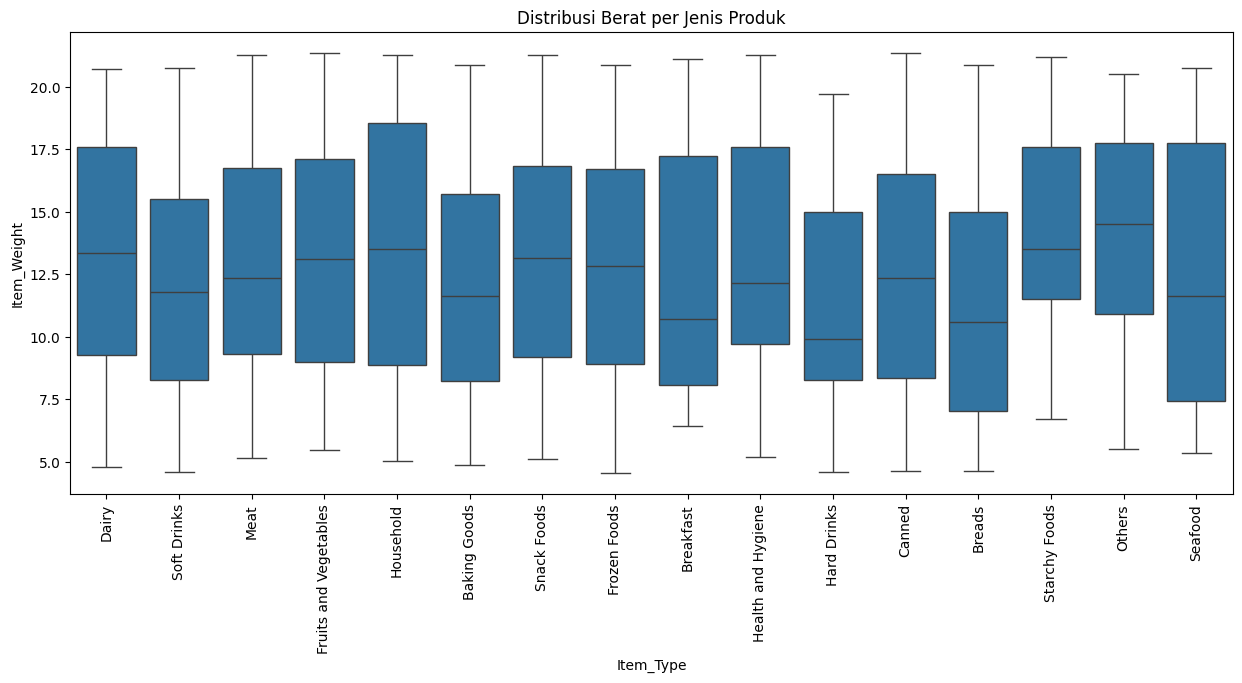

In [17]:
# Cek validasi apakah Item_Type punya pengaruh signifikan ke berat.

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='Item_Type', y='Item_Weight')
plt.xticks(rotation=90)
plt.title('Distribusi Berat per Jenis Produk')
plt.show()

In [19]:
# Isi missing value dengan rata-rata berat per jenis produk
df['Item_Weight'] = df.groupby('Item_Type')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

# Cek apakah sudah terisi semua
print("Sisa missing value di Item_Weight:", df['Item_Weight'].isnull().sum())

Sisa missing value di Item_Weight: 0


In [20]:
# Cek jumlah missing value per kolom
print("\nJumlah missing value per kolom:")
print(df.isnull().sum())


Jumlah missing value per kolom:
Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [21]:
# Cek Pola Ukuran Outlet per Jenis Outlet
outlet_distribution = df.pivot_table(index='Outlet_Type', columns='Outlet_Size', aggfunc='size', fill_value=0)
print("\nDistribusi Outlet Size per Outlet Type:")
print(outlet_distribution)


Distribusi Outlet Size per Outlet Type:
Outlet_Size        High  Medium  Small
Outlet_Type                           
Grocery Store         0       0    528
Supermarket Type1   932     930   1860
Supermarket Type2     0     928      0
Supermarket Type3     0     935      0


In [22]:
# Mengisi missing value untuk Grocery Store dengan 'Small'
df.loc[(df['Outlet_Type'] == 'Grocery Store') & (df['Outlet_Size'].isnull()), 'Outlet_Size'] = 'Small'

# Mengisi missing value untuk Supermarket Type2 dengan 'Medium'
df.loc[(df['Outlet_Type'] == 'Supermarket Type2') & (df['Outlet_Size'].isnull()), 'Outlet_Size'] = 'Medium'

# Mengisi missing value untuk Supermarket Type3 dengan 'Medium'
df.loc[(df['Outlet_Type'] == 'Supermarket Type3') & (df['Outlet_Size'].isnull()), 'Outlet_Size'] = 'Medium'

# Cek sisa missing value
print("Sisa missing value di Outlet_Size:", df['Outlet_Size'].isnull().sum())

Sisa missing value di Outlet_Size: 1855


In [23]:
# Lihat distribusi Outlet_Size dalam Supermarket Type1 per Outlet_Identifier
supermarket1_mapping = df[df['Outlet_Type'] == 'Supermarket Type1'][['Outlet_Identifier', 'Outlet_Size']].drop_duplicates().sort_values(by='Outlet_Identifier')
print(supermarket1_mapping)

   Outlet_Identifier Outlet_Size
4             OUT013        High
9             OUT017         NaN
19            OUT035       Small
8             OUT045         NaN
11            OUT046       Small
0             OUT049      Medium


In [24]:
# Buat mapping ukuran outlet per Outlet_Identifier yang sudah diketahui
supermarket1_size_map = {
    'OUT013': 'High',
    'OUT035': 'Small',
    'OUT046': 'Small',
    'OUT049': 'Medium'
}

# Isi missing value berdasarkan mapping ini
df['Outlet_Size'] = df.apply(
    lambda row: supermarket1_size_map[row['Outlet_Identifier']] if (pd.isnull(row['Outlet_Size']) and row['Outlet_Type'] == 'Supermarket Type1' and row['Outlet_Identifier'] in supermarket1_size_map)
    else row['Outlet_Size'], axis=1)

# Cek sisa missing value
print("Sisa missing value di Outlet_Size:", df['Outlet_Size'].isnull().sum())

Sisa missing value di Outlet_Size: 1855


In [25]:
# Cek jumlah data untuk OUT017 dan OUT045
outlet_counts = df[df['Outlet_Identifier'].isin(['OUT017', 'OUT045'])]['Outlet_Identifier'].value_counts()

print(outlet_counts)

Outlet_Identifier
OUT045    929
OUT017    926
Name: count, dtype: int64


In [28]:
print(pd.crosstab(df['Outlet_Location_Type'], df['Outlet_Size'], normalize='index')*100)

Outlet_Size                High     Medium       Small
Outlet_Location_Type                                  
Tier 1                 0.000000  38.944724   61.055276
Tier 2                 0.000000   0.000000  100.000000
Tier 3                27.820896  55.611940   16.567164


In [29]:
# Filter data yang Outlet_Size-nya masih null dan Outlet_Type-nya Supermarket Type1
missing_supermarket = df[(df['Outlet_Type'] == 'Supermarket Type1') & (df['Outlet_Size'].isnull())]

# Cek distribusi Outlet_Location_Type untuk data yang missing tersebut
print(missing_supermarket['Outlet_Location_Type'].value_counts())

Outlet_Location_Type
Tier 2    1855
Name: count, dtype: int64


In [31]:
# Isi missing value di Supermarket Type1 yang berada di Tier 2 dengan 'Small'
df.loc[(df['Outlet_Type'] == 'Supermarket Type1') & (df['Outlet_Size'].isnull()), 'Outlet_Size'] = 'Small'

# Cek sisa missing value
print("Sisa missing value di Outlet_Size:", df['Outlet_Size'].isnull().sum())

Sisa missing value di Outlet_Size: 0


In [32]:
# Cek jumlah missing value per kolom
print("\nJumlah missing value per kolom:")
print(df.isnull().sum())


Jumlah missing value per kolom:
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [33]:
df.head(50)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350


In [34]:
#cek missing value di item visibility
print("Jumlah missing value di Item_Visibility:", df['Item_Visibility'].isnull().sum())

Jumlah missing value di Item_Visibility: 0


In [35]:
#Cek Ada Berapa Data yang Nilainya 0

print("Jumlah Item_Visibility yang 0:", (df['Item_Visibility'] == 0).sum())

Jumlah Item_Visibility yang 0: 526


In [36]:
# Filter produk yang visibility-nya 0
produk_visibility_nol = df[df['Item_Visibility'] == 0]

# Cek jumlah data per Outlet_Identifier
distribusi_outlet = produk_visibility_nol['Outlet_Identifier'].value_counts()

# Cek jumlah data per Item_Type
distribusi_item_type = produk_visibility_nol['Item_Type'].value_counts()

# Cek jumlah data per Item_Identifier
distribusi_produk = produk_visibility_nol['Item_Identifier'].value_counts()

# Tampilkan
print("Distribusi berdasarkan Outlet:")
print(distribusi_outlet)

print("\nDistribusi berdasarkan Item Type:")
print(distribusi_item_type)

print("\nTop 10 Produk dengan Visibility 0:")
print(distribusi_produk.head(10))

Distribusi berdasarkan Outlet:
Outlet_Identifier
OUT018    65
OUT046    61
OUT027    60
OUT013    59
OUT045    58
OUT017    57
OUT035    54
OUT049    53
OUT019    30
OUT010    29
Name: count, dtype: int64

Distribusi berdasarkan Item Type:
Item_Type
Fruits and Vegetables    87
Snack Foods              68
Household                51
Frozen Foods             51
Baking Goods             45
Dairy                    38
Soft Drinks              34
Health and Hygiene       33
Canned                   33
Meat                     20
Hard Drinks              17
Breads                   17
Starchy Foods            15
Others                   10
Seafood                   4
Breakfast                 3
Name: count, dtype: int64

Top 10 Produk dengan Visibility 0:
Item_Identifier
FDY07    4
NCD19    3
NCQ05    3
NCK54    3
FDY55    3
FDH48    3
NCK29    3
FDX07    2
FDZ07    2
FDY28    2
Name: count, dtype: int64


In [45]:
#Mau cek apakah produk dengan Item_Visibility = 0 masih ada penjualan:
#Kalau tidak ada penjualan bisa dianggap dia ada di gudang

# Filter produk dengan visibility 0
visibility_zero = df[df['Item_Visibility'] == 0]

# Cek apakah produk-produk tersebut masih memiliki penjualan
sold_with_zero_visibility = visibility_zero[visibility_zero['Item_Outlet_Sales'] > 0]

# Tampilkan hasil
print(f"Jumlah produk dengan visibility 0: {visibility_zero.shape[0]}")
print(f"Jumlah produk dengan visibility 0 yang tetap terjual: {sold_with_zero_visibility.shape[0]}")

Jumlah produk dengan visibility 0: 526
Jumlah produk dengan visibility 0 yang tetap terjual: 526


In [ ]:
# KESIMPULAN:

# Kalau produk ini berada di gudang (tidak tersedia di etalase), seharusnya tidak ada transaksi/penjualan.
# Tapi ternyata semua produk visibility 0 tetap ada sales, bisa jadi:
# 1. Data tidak merepresentasikan bahwa visibility 0 = produk di gudang.
# 2. Kemungkinan besar visibility 0 adalah kesalahan input data.

In [46]:
# Buat rata-rata visibility per produk
mean_visibility_per_product = df.groupby('Item_Identifier')['Item_Visibility'].mean()

# Function untuk mengganti 0 dengan rata-rata produk
def ganti_visibility(row):
    if row['Item_Visibility'] == 0:
        return mean_visibility_per_product[row['Item_Identifier']]
    else:
        return row['Item_Visibility']

# Apply function
df['Item_Visibility'] = df.apply(ganti_visibility, axis=1)

In [47]:
print("Jumlah data dengan visibility = 0 setelah cleansing:", (df['Item_Visibility'] == 0).sum())

Jumlah data dengan visibility = 0 setelah cleansing: 0


In [55]:
print(df['Item_Visibility'].describe())

count    8523.000000
mean        0.069670
std         0.049810
min         0.003575
25%         0.031114
50%         0.056922
75%         0.097160
max         0.328391
Name: Item_Visibility, dtype: float64


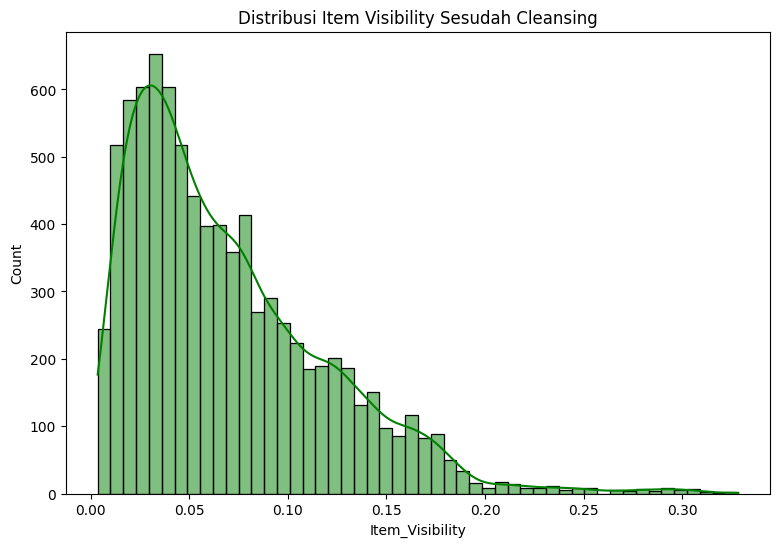

In [65]:
plt.figure(figsize=(20,6))

plt.subplot(1, 2, 2)
sns.histplot(df['Item_Visibility'], bins=50, kde=True, color='green')
plt.title('Distribusi Item Visibility Sesudah Cleansing')

plt.show()

In [75]:
# Hitung threshold visibility tinggi (misal top 5%)
threshold = df['Item_Visibility'].quantile(0.95)
print(f'Threshold Visibility Tinggi: {threshold}')

Threshold Visibility Tinggi: 0.16393883709999998


In [76]:
# Filter item dengan visibility tinggi
high_visibility = df[df['Item_Visibility'] > threshold]

In [77]:
# Crosstab untuk lihat distribusi Item Type per Outlet Type
item_visibility_distribution = pd.crosstab(high_visibility['Outlet_Type'], high_visibility['Item_Type'], normalize='index') * 100

print("\nDistribusi Item Type dengan Visibility Tinggi per Outlet Type (%):")
print(item_visibility_distribution)


Distribusi Item Type dengan Visibility Tinggi per Outlet Type (%):
Item_Type          Baking Goods    Breads  Breakfast     Canned      Dairy  \
Outlet_Type                                                                  
Grocery Store         11.353712  2.183406   1.746725   6.550218  10.043668   
Supermarket Type1      7.894737  1.973684   0.000000  11.184211  11.184211   
Supermarket Type2      8.000000  4.000000   0.000000  12.000000  16.000000   
Supermarket Type3      4.761905  0.000000   0.000000   0.000000  14.285714   

Item_Type          Frozen Foods  Fruits and Vegetables  Hard Drinks  \
Outlet_Type                                                           
Grocery Store          8.296943              17.030568     1.746725   
Supermarket Type1      1.973684              19.078947     1.973684   
Supermarket Type2      4.000000               4.000000     0.000000   
Supermarket Type3      0.000000              23.809524     0.000000   

Item_Type          Health and Hygien

<Figure size 1500x800 with 0 Axes>

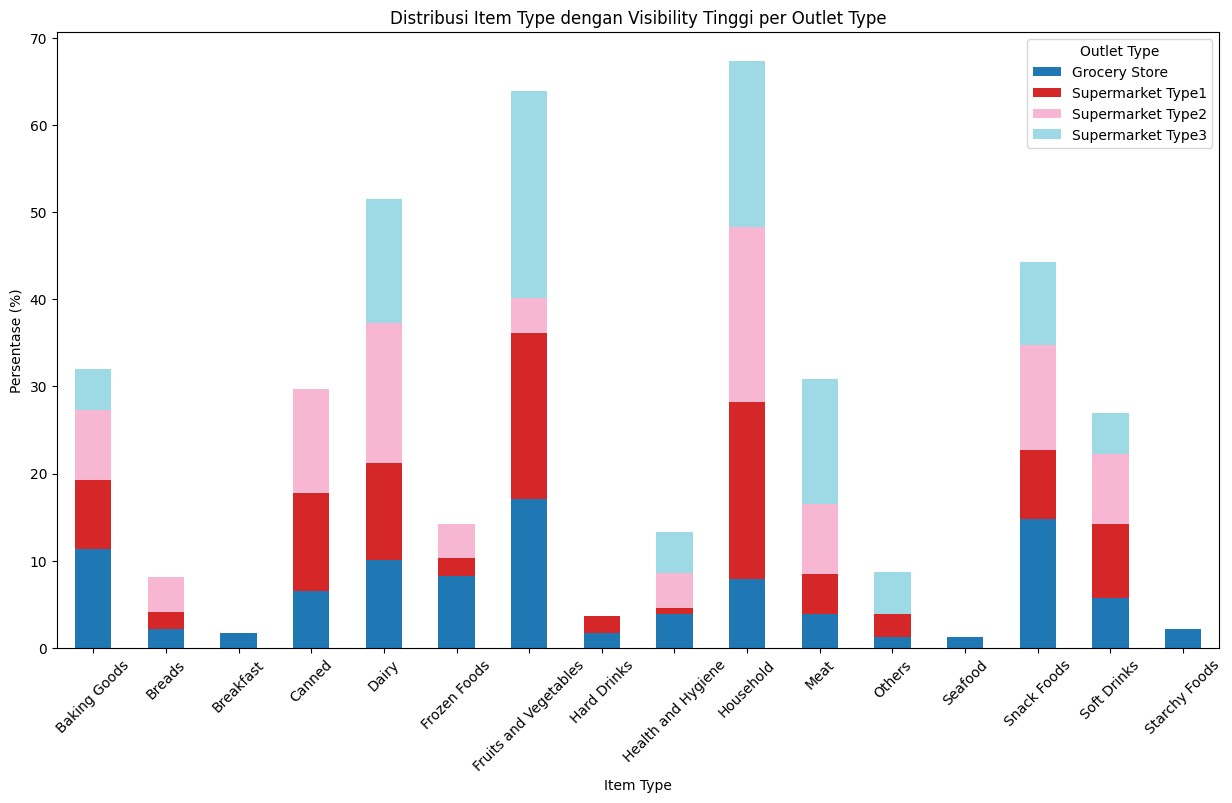

In [78]:
plt.figure(figsize=(15,8))
item_visibility_distribution.T.plot(kind='bar', stacked=True, figsize=(15,8), colormap='tab20')
plt.title('Distribusi Item Type dengan Visibility Tinggi per Outlet Type')
plt.ylabel('Persentase (%)')
plt.xlabel('Item Type')
plt.legend(title='Outlet Type')
plt.xticks(rotation=45)
plt.show()